## CSI 5137[C] Application of NLP and ML in Software Engineering 
## For 'PC1' Dataset
```
#Project : Predicting Software Bugs using Machine Learning algorithms 
Honey Patel - 300253332
Jay Patel - 300288159
```


### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Traning algorithms without resampling and feature selection 

###Importing the final dataset 

In [ ]:
dataset = pd.read_csv("pc1.csv")
dataset

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,6.0,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,...,6,0,0,2,10.0,3.0,18.0,8.0,7.0,False
1105,10.0,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,...,10,0,0,1,14.0,5.0,28.0,15.0,9.0,False
1106,5.0,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,...,5,0,0,0,8.0,5.0,11.0,6.0,5.0,False
1107,18.0,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,...,18,0,0,1,22.0,24.0,61.0,50.0,15.0,False


## Data Preprocessing

### Checking for missing values

In [ ]:
#checking for missing values
print('Number of Missing values in each column')
dataset.isnull().sum()

Number of Missing values in each column


loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

### Checking for null values

In [ ]:
#checking for null values
dataset.isna().any()

loc                  False
v(g)                 False
ev(g)                False
iv(g)                False
n                    False
v                    False
l                    False
d                    False
i                    False
e                    False
b                    False
t                    False
lOCode               False
lOComment            False
lOBlank              False
locCodeAndComment    False
uniq_Op              False
uniq_Opnd            False
total_Op             False
total_Opnd           False
branchCount          False
defects              False
dtype: bool

### Categorizing the Dataset into different dataframes

In [ ]:
#taking only numeric data
dataset_numeric = dataset[["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]].copy()
dataset_numeric.head()

,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,0.70,3212.96,80,44,11,31,29.0,66.0,192.0,126.0,17.0
3,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,0.85,4015.70,97,41,12,24,28.0,75.0,229.0,152.0,38.0
4,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,6.90,87305.94,457,71,48,49,64.0,397.0,1397.0,942.0,178.0


In [ ]:
#taking only the target label
dataset_target = dataset[["defects"]].copy()
dataset_target.head()

,defects
0,False
1,True
2,True
3,True
4,True


### Combining the dataframes

In [ ]:
frames = [dataset_numeric, dataset_target]
dataset = pd.concat(frames, axis=1)
dataset

,v(g),ev(g),iv(g),n,v,l,d,i,e,b,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,0.70,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,True
3,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,0.85,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,True
4,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,6.90,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,0.03,...,6,0,0,2,10.0,3.0,18.0,8.0,7.0,False
1105,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,0.06,...,10,0,0,1,14.0,5.0,28.0,15.0,9.0,False
1106,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,0.02,...,5,0,0,0,8.0,5.0,11.0,6.0,5.0,False
1107,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,0.20,...,18,0,0,1,22.0,24.0,61.0,50.0,15.0,False


### Spliting the dataset

In [ ]:
X = dataset.drop("defects", axis=1)
y = dataset.defects

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

### Feature Scaling on numeric data

In [ ]:
numerical_features = ["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]
scaler = StandardScaler()

transformer = ColumnTransformer([("scaler", scaler, numerical_features)], remainder = "passthrough")
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)
X_train = transformed_X_train
X_test = transformed_X_test

## Applying algorithms and Training models using 10 fold cross validation

### Defining the models : Decision tree, Random forest, Logistic Regression, SVM, KNN, Navie Bayes

In [ ]:
model1 = DecisionTreeClassifier(criterion='entropy')
model2 = RandomForestClassifier(n_estimators = 200, criterion='entropy') 
model3 = LogisticRegression(C=1)
model4 = LinearSVC(C = 1.0) 
model5 = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
model6 = GaussianNB()
#model7 = MLPClassifier(hidden_layer_sizes=(50,51), max_iter=200, activation='relu', learning_rate='constant', alpha=0.05)

### 10-fold Cross Validation using cross_val_score function

In [ ]:
def model_train(X, y, X_train, X_test, y_train, y_test) :
    Rc_cross_accuracy = []
    Dc_cross_accuracy = []
    Lr_cross_accuracy = []
    Sc_cross_accuracy = []
    Kn_cross_accuracy = []
    Nb_cross_accuracy = []
    Rscore = []
    Dscore = []
    Lscore = []
    Sscore = []
    Kscore = []
    Nscore = []

    Dc_cross_accuracy = cross_val_score(model1, X, y, cv=10)
    print("\n\n--------------------------------------------- For Decision Tree Classifier ---------------------------------------------")
    Dscore = (np.mean(Dc_cross_accuracy))*100
    model1.fit(X_train,y_train)
    dy_pred = model1.predict(X_test)
    print("\nAccuracy by cross_val_score fuction : ", Dscore)
    print("F1 score : ",f1_score(y_test, dy_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, dy_pred))
    print("\nClassification Report : \n",metrics.classification_report(y_test, dy_pred))

    Rc_cross_accuracy = cross_val_score(model2, X, y, cv=10)
    print("\n---------------------------------------------- For Random Forest Classifier ----------------------------------------------")
    Rscore = (np.mean(Rc_cross_accuracy))*100
    model2.fit(X_train,y_train)
    ry_pred = model2.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Rscore)
    print("F1 score : ",f1_score(y_test, ry_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ry_pred))
    print("\nClassification Report : \n",metrics.classification_report(y_test, ry_pred))

    Lr_cross_accuracy = cross_val_score(model3, X, y, cv=10)
    print("\n------------------------------------------------- For Logistic Regression -------------------------------------------------")
    Lscore = (np.mean(Lr_cross_accuracy))*100
    model3.fit(X_train,y_train)
    ly_pred = model3.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Lscore)
    print("F1 score : ",f1_score(y_test, ly_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ly_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ly_pred))

    Sc_cross_accuracy = cross_val_score(model4, X, y, cv=10)
    print("\n----------------------------------------------- For Support Vector Classifier -----------------------------------------------")
    Sscore = (np.mean(Sc_cross_accuracy))*100
    model4.fit(X_train,y_train)
    sy_pred = model4.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Sscore)
    print("F1 score : ",f1_score(y_test, sy_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, sy_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, sy_pred))

    Kn_cross_accuracy = cross_val_score(model5, X, y, cv=10)
    print("\n-------------------------------------------------- For K-Nearest Neighbors --------------------------------------------------")
    Kscore = (np.mean(Kn_cross_accuracy))*100
    model5.fit(X_train, y_train)
    ky_pred = model5.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Kscore)
    print("F1 score : ",f1_score(y_test, ky_pred)) 
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ky_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ky_pred))

    Nb_cross_accuracy = cross_val_score(model6, X, y, cv=10)
    print("\n------------------------------------------------ For Navie Bayes Classifier ------------------------------------------------")
    Nscore = (np.mean(Nb_cross_accuracy))*100
    model6.fit(X_train,y_train)
    ny_pred = model6.predict(X_test)
    print("Accuracy by cross_val_score fuction : ", Nscore)
    print("F1 score : ",f1_score(y_test, ny_pred))
    print("\nConfusion Matrix :-\n", metrics.confusion_matrix(y_test, ny_pred))
    print("\nClassification Report :- \n",metrics.classification_report(y_test, ny_pred))

    return Dscore, Rscore, Lscore, Sscore, Kscore, Nscore

### Training the models and getting Accuracy, F1_Score, Confusion matrix, Classification report (precision, recall, support)

In [ ]:
Dscore, Rscore, Lscore, Sscore, Kscore, Nscore = model_train(X, y, X_train, X_test, y_train, y_test)



--------------------------------------------- For Decision Tree Classifier ---------------------------------------------

Accuracy by cross_val_score fuction :  89.54627354627354
F1 score :  0.28571428571428575

Confusion Matrix :-
 [[198   9]
 [ 11   4]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.95      0.96      0.95       207
        True       0.31      0.27      0.29        15

    accuracy                           0.91       222
   macro avg       0.63      0.61      0.62       222
weighted avg       0.90      0.91      0.91       222


---------------------------------------------- For Random Forest Classifier ----------------------------------------------
Accuracy by cross_val_score fuction :  92.96887796887799
F1 score :  0.5

Confusion Matrix :-
 [[207   0]
 [ 10   5]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.95      1.00      0.98       207
        Tr

# Applying Feature selection, and Hyperparameter tuning to improve the accuracy and training algorithms  

In [ ]:
X = dataset.drop("defects", axis=1)
y = dataset.defects

## Feature Selection


In [ ]:
for label, content in dataset.items():
    if pd.api.types.is_string_dtype(content):
        dataset[label] = content.astype("category")

### Correlation Matrix

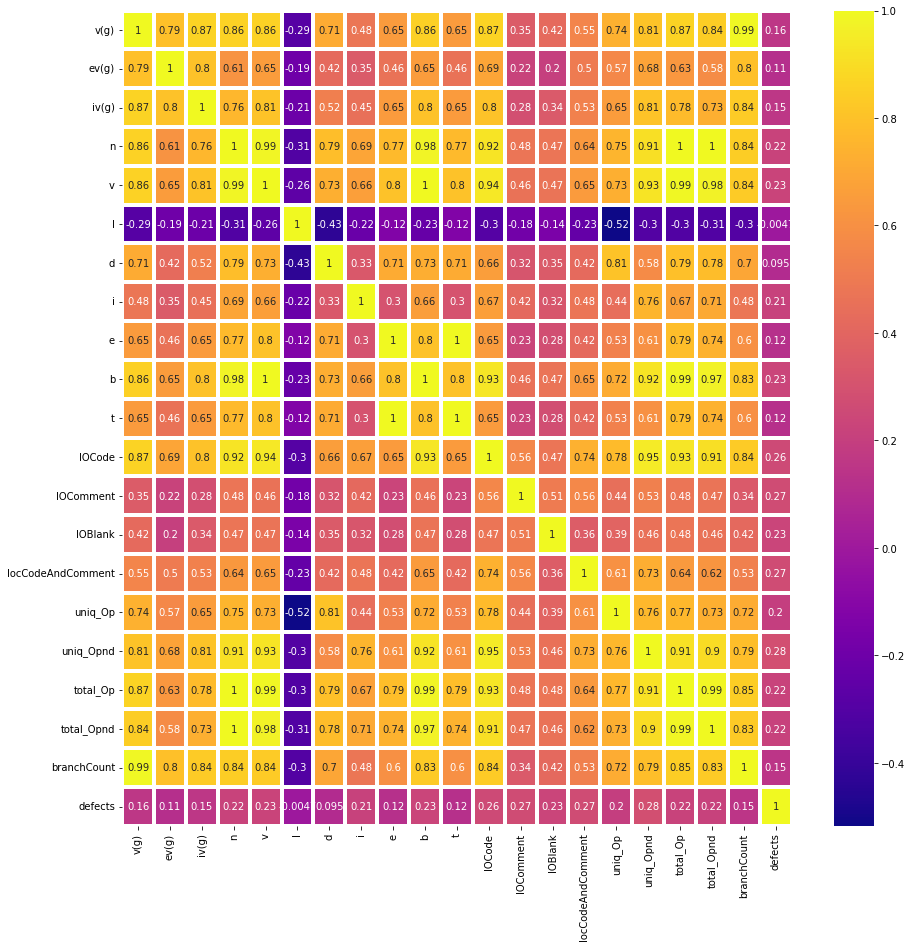

In [ ]:
plt.figure(figsize=(15,15))
corr = dataset.corr()
sns.heatmap(corr, annot = True, linewidths=3, cmap="plasma")

In [ ]:
corr_series = abs(corr.defects).sort_values(ascending = False)
top = pd.Series()
names = []
locations = []
for index, value in corr_series.items():
    if pd.api.types.is_float(value):
        if value > 0.085:
            names.append(value)
            locations.append(index)
      
names = names [1:]
locations = locations [1:]

values = pd.Series(names, index = locations)

top = top.append(values)
top

uniq_Opnd            0.282962
locCodeAndComment    0.270502
lOComment            0.265339
lOCode               0.257873
lOBlank              0.234709
b                    0.233760
v                    0.228580
total_Op             0.223580
n                    0.221494
total_Opnd           0.217097
i                    0.213632
uniq_Op              0.197057
v(g)                 0.157536
iv(g)                0.154809
branchCount          0.150539
t                    0.117675
e                    0.117675
ev(g)                0.113434
d                    0.094567
dtype: float64

### Finding Absolute Value of Correlation of features with each other

In [ ]:
i_visited  = []
to_be_removed = []
all_indexes = []
for index, value in top.items():
    for index1, value in top.items():
        if(index not in all_indexes):
            all_indexes.append(index)
        if(abs(dataset[index].corr(dataset[index1]))) > 0.5 and index != index1:
            if(index not in i_visited and index1 not in i_visited):
                i_visited.append(index)
                i_visited.append(index1)
                to_be_removed.append(index1)
                print(f"The Absolute Value of Correlation For {index} and {index1} is: {dataset[index].corr(dataset[index1])}")

The Absolute Value of Correlation For uniq_Opnd and locCodeAndComment is: 0.7258769735965167
The Absolute Value of Correlation For lOComment and lOCode is: 0.5577715635247698
The Absolute Value of Correlation For b and v is: 0.9952207965573834
The Absolute Value of Correlation For total_Op and n is: 0.9973629423685504
The Absolute Value of Correlation For total_Opnd and i is: 0.7090356314828523
The Absolute Value of Correlation For uniq_Op and v(g) is: 0.7382334039446761
The Absolute Value of Correlation For iv(g) and branchCount is: 0.8395533199024685
The Absolute Value of Correlation For t and e is: 0.9999999999879202


In [ ]:
all_indexes, to_be_removed #features to be removed

(['uniq_Opnd',
  'locCodeAndComment',
  'lOComment',
  'lOCode',
  'lOBlank',
  'b',
  'v',
  'total_Op',
  'n',
  'total_Opnd',
  'i',
  'uniq_Op',
  'v(g)',
  'iv(g)',
  'branchCount',
  't',
  'e',
  'ev(g)',
  'd'],
 ['locCodeAndComment', 'lOCode', 'v', 'n', 'i', 'v(g)', 'branchCount', 'e'])

In [ ]:
dataset=dataset.drop(to_be_removed,axis=1)

### New dataset with features selection

In [ ]:
dataset.head()

,ev(g),iv(g),l,d,b,t,lOComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,defects
0,1.4,1.4,1.30,1.30,1.30,1.30,2,2,1.2,1.2,1.2,1.2,False
1,1.0,1.0,1.00,1.00,1.00,1.00,1,1,1.0,1.0,1.0,1.0,True
2,3.0,2.0,0.04,27.68,0.70,3212.96,44,11,29.0,66.0,192.0,126.0,True
3,5.0,18.0,0.04,28.37,0.85,4015.70,41,12,28.0,75.0,229.0,152.0,True
4,41.0,82.0,0.01,75.93,6.90,87305.94,71,48,64.0,397.0,1397.0,942.0,True


## Spliting the dataset and getting new X and y after feature selection and Hyperparamter tuning

In [ ]:
X_fsh = dataset.drop("defects", axis=1)
y_fsh = dataset.defects

X_train_fsh, X_test_fsh, y_train_fsh, y_test_fsh = train_test_split(X_fsh, y_fsh, test_size = 0.2, stratify=y_fsh)

## Feature Scaling the updated dataset with X_fsh, y_fsh

In [ ]:
numerical_features = X_fsh.columns
scaler = StandardScaler()

transformer = ColumnTransformer([("scaler", scaler, numerical_features)], remainder = "passthrough")
transformed_X_train_fsh = transformer.fit_transform(X_train_fsh)
transformed_X_test_fsh = transformer.transform(X_test_fsh)
X_train_fsh = transformed_X_train_fsh
X_test_fsh = transformed_X_test_fsh

##Hyperparameter Tuning 

### Making dictionary of algorithms and parameters we want to tune in hyperparameter tuning

In [ ]:
model_params = {
    
    'Decision_tree': {
        'model': DecisionTreeClassifier(ccp_alpha=0.3,min_samples_split = 2, min_samples_leaf=10),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [1,2,3,5,9,7], 
            #'min_samples_leaf' : [i for i in range(1, 16)],
            #'ccp_alpha' : [0.1, 0.2, 0.3, 0.4, 0.5],
        }
    },

    'Random_forest': {
        'model': RandomForestClassifier(min_samples_split = 2, min_samples_leaf=10),
        'params' : {
            'criterion': ['gini','entropy'],
            'n_estimators': [100, 300, 500, 700, 1000],
            'max_depth' : [10, 20, 30, 40, 50],
            #'min_samples_split' : [2, 5, 10, 15, 100],
            #'max_features': [i for i in range(5, 52, 5)]
        }
    },

    'LR' : {
        'model': LogisticRegression(),
        'params': {
            'penalty' : ['l1', 'l2', 'elasticnet','None'],
            'C': [0.5, 0.25, 0.75, 1, 1.25, 1.75],
            'max_iter' : [100, 200, 300]
        }
    }, 

    'SVM': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.25, 0.5, 0.75, 1, 1.25, 1.75],
            #'gamma': ['scale', 'auto']
        }  
    },

    'KNN' : {
        'model': KNeighborsClassifier(metric='minkowski', p = 2),
        'params': {
            'n_neighbors': [5, 10, 15, 20, 25, 30],
            'weights':['uniform','distance'],
            #'metric':['minkowski', 'euclidean', 'manhattan']
        }
    }, 

    'Navie Bayes' : {
        'model':  GaussianNB(),
        'params': {
            'var_smoothing' : [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e10, 1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 1e2, 1e1]
        }
    }

}

### Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

def grid_search(dataset) :
    scores = []

    for model_name, mp in model_params.items():
        gd =  GridSearchCV(mp['model'], mp['params'], cv=2, return_train_score=False, verbose=1, n_jobs=-1)
        gd.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': gd.best_score_,
            'best_params': gd.best_params_
        })
        
    df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
    df
    return(df)

In [ ]:
#getting the best score and best parameters 
df = grid_search(dataset)
print(df)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 50 candidates, totalling 100 fits
Fitting 2 folds for each of 72 candidates, totalling 144 fits
Fitting 2 folds for each of 6 candidates, totalling 12 fits
Fitting 2 folds for each of 12 candidates, totalling 24 fits
Fitting 2 folds for each of 21 candidates, totalling 42 fits
           model  best_score  \
0  Decision_tree    0.930569   
1  Random_forest    0.930569   
2             LR    0.917955   
3            SVM    0.929668   
4            KNN    0.930569   
5    Navie Bayes    0.931470   

                                         best_params  
0              {'criterion': 'gini', 'max_depth': 1}  
1  {'criterion': 'gini', 'max_depth': 10, 'n_esti...  
2      {'C': 1.25, 'max_iter': 200, 'penalty': 'l2'}  
3                                        {'C': 0.25}  
4          {'n_neighbors': 20, 'weights': 'uniform'}  
5                            {'var_smoothing': 10.0}  


###Defining the models with best parameters

In [ ]:
model1 = DecisionTreeClassifier(criterion=df.iloc[0]['best_params']['criterion'], max_depth=df.iloc[0]['best_params']['max_depth'], ccp_alpha=0.3, min_samples_leaf=10, min_samples_split=2)
model2 = RandomForestClassifier(criterion=df.iloc[1]['best_params']['criterion'], n_estimators=df.iloc[1]['best_params']['n_estimators'], max_depth=df.iloc[1]['best_params']['max_depth'], min_samples_split=2, min_samples_leaf=10) #max_features=df.iloc[1]['best_params']['max_features']) 
model3 = LogisticRegression(penalty=df.iloc[2]['best_params']['penalty'], C=df.iloc[2]['best_params']['C'], max_iter=df.iloc[2]['best_params']['max_iter'])
model4 = SVC(C=df.iloc[3]['best_params']['C'], gamma='auto') 
model5 = KNeighborsClassifier(n_neighbors=df.iloc[4]['best_params']['n_neighbors'], weights=df.iloc[4]['best_params']['weights'],  metric='minkowski', p = 2)
model6 = GaussianNB(var_smoothing=df.iloc[5]['best_params']['var_smoothing'])
#model7 = MLPClassifier(hidden_layer_sizes=df.iloc[6]['best_params']['hidden_layer_sizes'], max_iter=df.iloc[6]['best_params']['max_iter'], activation=df.iloc[6]['best_params']['activation'], learning_rate='constant', solver='adam', alpha=df.iloc[6]['best_params']['alpha'])

### Training the models using 10-fold cross validation and getting Accuracy

In [ ]:
#models defined above and getting accuracy by calling the funcation model_train
Dscore_fsh, Rscore_fsh, Lscore_fsh, Sscore_fsh, Kscore_fsh, Nscore_fsh = model_train(X_fsh, y_fsh, X_train_fsh, X_test_fsh, y_train_fsh, y_test_fsh)



--------------------------------------------- For Decision Tree Classifier ---------------------------------------------

Accuracy by cross_val_score fuction :  95.15733005733006
F1 score :  0.0

Confusion Matrix :-
 [[207   0]
 [ 15   0]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.93      1.00      0.97       207
        True       0.00      0.00      0.00        15

    accuracy                           0.93       222
   macro avg       0.47      0.50      0.48       222
weighted avg       0.87      0.93      0.90       222


---------------------------------------------- For Random Forest Classifier ----------------------------------------------
Accuracy by cross_val_score fuction :  95.25733005733007
F1 score :  0.11764705882352941

Confusion Matrix :-
 [[206   1]
 [ 14   1]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.94      1.00      0.96       207
        Tr

## Table showing the accuracies of the six algorithms before and after hyperparameter tunning and feature selection

In [41]:
Acc = [Dscore, Rscore, Lscore, Sscore, Kscore, Nscore]
Acc_fsh = [Dscore_fsh, Rscore_fsh, Lscore_fsh, Sscore_fsh, Kscore_fsh, Nscore_fsh]

table_final = np.column_stack((Acc, Acc_fsh))
table_frame = pd.DataFrame(table_final, columns = ['Accuracy_befr_HPT', 'Accuracy_wth_HPT_FS'], 
                                 index = ['Decision_Tree', 'Random_Forest', 'Logistic_Regression', 'SVM', 'KNN', 'Naive_Bayes'])
table_frame

,Accuracy_befr_HPT,Accuracy_wth_HPT_FS
Decision_Tree,89.546274,95.157330
Random_Forest,92.968878,95.257330
Logistic_Regression,93.147420,93.976249
SVM,85.117936,94.957330
KNN,93.149058,94.857330
Naive_Bayes,89.090090,93.967240


## Feature Ranking 

In [42]:
import sys
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

#Feature Ranking
res =  mutual_info_classif(X, y)
res = [0.21819637, 0.26307731,0.02089729,0.10408425,0.11165286,0.00157417
, 0.18526162, 0.20435355, 0.22257146, 0.21166985, 0.16536938, 0.22514492,
 0.18096379, 0.17603666, 0.02876315, 0.14915057, 0.10985039, 0.03965201,
 0.07511509, 0.0803626,  0.06559521, 0.0218448,  0.15778717,
 0.13496679, 0.01078187, 0.04066395]
features_name = ["v(g)", "ev(g)", "iv(g)", "n", "v", "l",	"d", "i", "e", "b", "t", "lOCode", "lOComment", "lOBlank", "locCodeAndComment", "uniq_Op",	"uniq_Opnd",	"total_Op",	"total_Opnd", "branchCount"]
features = []
for ind, i in enumerate(features_name):
    features.append([i, res[ind]])

features = sorted(features, key= lambda x:x[1], reverse= True)
for i in features:
    print(i[0],"\t",i[1])

ev(g) 	 0.26307731
lOCode 	 0.22514492
e 	 0.22257146
v(g) 	 0.21819637
b 	 0.21166985
i 	 0.20435355
d 	 0.18526162
lOComment 	 0.18096379
lOBlank 	 0.17603666
t 	 0.16536938
uniq_Op 	 0.14915057
v 	 0.11165286
uniq_Opnd 	 0.10985039
n 	 0.10408425
branchCount 	 0.0803626
total_Opnd 	 0.07511509
total_Op 	 0.03965201
locCodeAndComment 	 0.02876315
iv(g) 	 0.02089729
l 	 0.00157417
